In [ ]:
!pip install pandas
!pip install ezdxf
!pip install rectpack

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for rectpack: filename=rectpack-0.2.2-py3-none-any.whl size=19333 sha256=1f051c1e7e9911357e2f4e735f522c81a57151b4efe49f02750c213c932b97ff
  Stored in directory: /root/.cache/pip/wheels/e9/ea/e9/cd0237c0ccb9cb7312bb94cc023689592c4f07e4f3b1b9dd00
Successfully built rectpack


In [ ]:
from rectpack import newPacker
import pandas as pd
import math
import ezdxf


In [ ]:

df= pd.read_csv('data.csv')
need_sheets =math.ceil(sum(df['Width']*df['Height']*df['Qty'])/(2440*1220))
rectangles=[]
saw_width=10
for ind in df.index:
  for i in range(df['Qty'][ind]):
    rectangles.append((df['Width'][ind]+saw_width,df['Height'][ind]+saw_width,ind))
print(rectangles)
# rectangles = [(200, 400), (200, 400), (200, 400),(200, 100),(200, 100),(200, 100),(200, 100),(200, 100),(200,150),(200,150),(200,150),(200,150)]
bins=[]
for i in range(need_sheets):
  bins.append((2440,1220))

packer = newPacker()
# Add the rectangles to packing queue
for r in rectangles:
	packer.add_rect(*r)
# Add the bins where the rectangles will be placed
for b in bins:
	packer.add_bin(*b)

# Start packing
packer.pack()
all_rects = packer.rect_list()


[(210, 410, 0), (210, 410, 0), (210, 410, 0), (210, 160, 1), (210, 160, 1), (210, 160, 1), (210, 160, 1), (210, 110, 2), (210, 110, 2), (210, 110, 2), (210, 110, 2), (210, 110, 2), (410, 210, 3), (510, 510, 4), (510, 510, 4), (510, 510, 4), (510, 510, 4), (510, 510, 4), (510, 510, 4), (510, 510, 4), (510, 510, 4), (510, 510, 4), (510, 510, 4), (510, 510, 4), (510, 510, 4)]


In [ ]:
for abin in packer:
  print(abin.bid) # Bin id if it has one
  for rect in abin:
    print(rect)

None
R(0, 0, 510, 510)
R(0, 510, 510, 510)
R(510, 0, 510, 510)
R(510, 510, 510, 510)
R(1020, 0, 510, 510)
R(1020, 510, 510, 510)
R(1530, 0, 510, 510)
R(1530, 510, 510, 510)
R(2040, 0, 210, 410)
R(2040, 410, 210, 410)
R(2250, 0, 160, 210)
R(2250, 210, 160, 210)
R(2250, 420, 160, 210)
R(2250, 630, 160, 210)
R(2040, 820, 210, 110)
R(2250, 840, 110, 210)
R(2040, 930, 210, 110)
R(0, 1050, 210, 110)
R(210, 1050, 210, 110)
None
R(0, 0, 510, 510)
R(0, 510, 510, 510)
R(510, 0, 510, 510)
R(510, 510, 510, 510)
R(1020, 0, 210, 410)
R(1020, 410, 210, 410)


In [ ]:
all_rects = packer.rect_list()
# print(all_rects)
for rect in all_rects:
  print(rect)
	# b, x, y, w, h, rid = rect



(0, 0, 0, 510, 510, 4)
(0, 0, 510, 510, 510, 4)
(0, 510, 0, 510, 510, 4)
(0, 510, 510, 510, 510, 4)
(0, 1020, 0, 510, 510, 4)
(0, 1020, 510, 510, 510, 4)
(0, 1530, 0, 510, 510, 4)
(0, 1530, 510, 510, 510, 4)
(0, 2040, 0, 210, 410, 0)
(0, 2040, 410, 210, 410, 0)
(0, 2250, 0, 160, 210, 1)
(0, 2250, 210, 160, 210, 1)
(0, 2250, 420, 160, 210, 1)
(0, 2250, 630, 160, 210, 1)
(0, 2040, 820, 210, 110, 2)
(0, 2250, 840, 110, 210, 2)
(0, 2040, 930, 210, 110, 2)
(0, 0, 1050, 210, 110, 2)
(0, 210, 1050, 210, 110, 2)
(1, 0, 0, 510, 510, 4)
(1, 0, 510, 510, 510, 4)
(1, 510, 0, 510, 510, 4)
(1, 510, 510, 510, 510, 4)
(1, 1020, 0, 210, 410, 0)
(1, 1020, 410, 210, 410, 3)


In [ ]:


# Create a new DXF drawing
doc = ezdxf.new('R2010')
doc.layers.add(name="MyLines",color=3)

# Add a new block for the rectangle

# Define the rectangle dimensions from a CSV file
# rectangles = [(10, 20), (15, 25), (30, 40)]

rect_entity=[]
blk = doc.blocks.new(name='RECTANGLE')
temp=blk.add_lwpolyline([(0, 0), (2440, 0), (2440, 1220), (0, 1220), (0, 0)])
rect_entity.append(blk)
temp.close()

# Add the rectangle entities to the block
for i,rect in enumerate(all_rects):
    b, x, y, w, h, rid = rect
    # rect_width, rect_height = rect
    blk = doc.blocks.new(name='RECTANGLE'+str(i))
    # temp=blk.add_lwpolyline([(0, 0), (w, 0), (w, h), (0, h), (0, 0)])
    temp=blk.add_lwpolyline([(0, 0), (w-saw_width, 0), (w-saw_width, h-saw_width), (0, h-saw_width), (0, 0)])
    rect_entity.append(blk)
    temp.close()


# Insert the block into the drawing


In [ ]:
msp = doc.modelspace()


for i,rect in enumerate(all_rects):
    b, x, y, w, h, rid = rect
    if(b>0):
      spacing=10
    else:
      spacing=0
    # rect_width,rect_height=rect
    # insert_point = (x+b*2440+spacing, y)
    insert_point = (x+b*2440+spacing+saw_width, y+saw_width)
    msp.add_blockref('RECTANGLE'+str(i), insert_point, dxfattribs={'xscale': 1, 'yscale': 1})
    msp.add_text(str(rid),height=0.3*h,dxfattribs={"layer":"Mylines"}).set_placement((insert_point[0]+0.5*w,insert_point[1]+0.5*h))
    # msp.add_linear_dim(base=(x_pos/2,2),p1=(x_pos,0),p2=(x_pos+rect_width,0),dxfattribs={"layer": "MyLines"}).render()
    # x_pos = x_pos+rect_width+3


In [ ]:
edge_trim=False
if(not edge_trim):
  edge_width=saw_width
else:
  edge_width=0
for n in range(len(packer)):
  if(n>0):
    spacing=10
  else:
    spacing=0
  msp.add_blockref('RECTANGLE', (2440*n+edge_width+spacing,0+edge_width), dxfattribs={'xscale': 1, 'yscale': 1})
# Save the drawing
doc.saveas('demo.dxf')
print("Total Number of Sheets used: ",len(packer))
print("Total Number of Panels required: ",sum(df['Qty']))
yield_per= (sum(df['Width']*df['Height']*df['Qty']))/(len(packer)*2440*1220)
print("Yield % : ", (yield_per*100))

Total Number of Sheets used:  2
Total Number of Panels required:  25
Yield % :  59.45982262832572


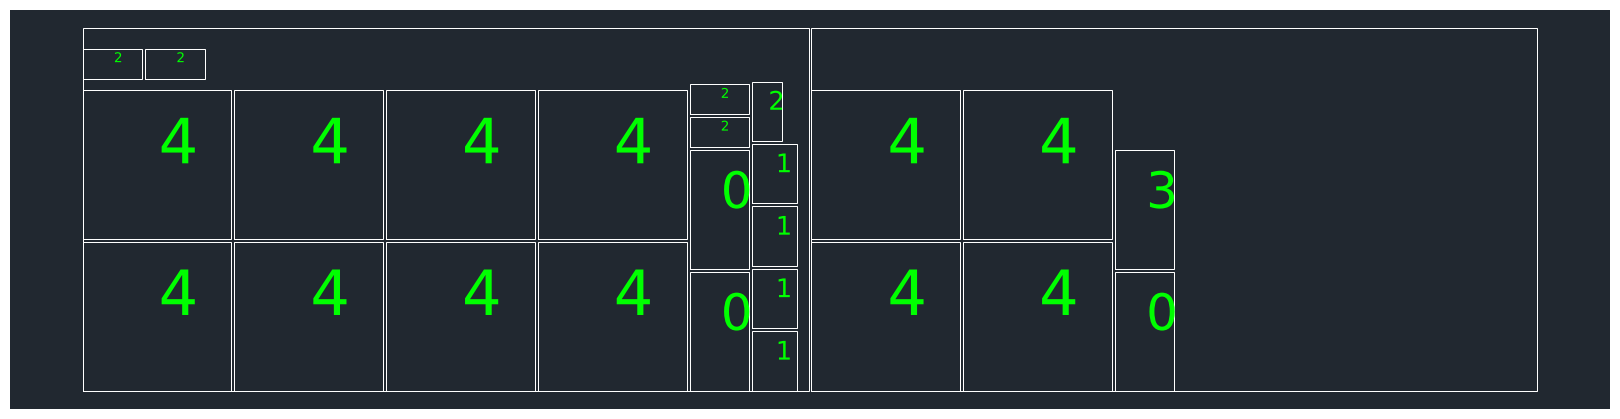

In [ ]:
import sys
import matplotlib.pyplot as plt
from ezdxf import recover
from ezdxf.addons.drawing import RenderContext, Frontend
from ezdxf.addons.drawing.matplotlib import MatplotlibBackend

# Safe loading procedure (requires ezdxf v0.14):
try:
    doc, auditor = recover.readfile('demo.dxf')
except IOError:
    print(f'Not a DXF file or a generic I/O error.')
    sys.exit(1)
except ezdxf.DXFStructureError:
    print(f'Invalid or corrupted DXF file.')
    sys.exit(2)

# The auditor.errors attribute stores severe errors,
# which may raise exceptions when rendering.
if not auditor.has_errors:
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ctx = RenderContext(doc)
    out = MatplotlibBackend(ax)
    Frontend(ctx, out).draw_layout(doc.modelspace(), finalize=True)
    fig.savefig('your.png', dpi=300)